In [34]:
import pandas as pd
import json

import gspread
from df2gspread import df2gspread as d2g
from oauth2client.service_account import ServiceAccountCredentials
from io import BytesIO
import requests

from matplotlib import pyplot as plt

<font color = blue>Google Sheets

In [2]:
scope = ['https://spreadsheets.google.com/feeds',
         'https://www.googleapis.com/auth/drive']

my_mail = 'test-kornilova@poised-elf-356913.iam.gserviceaccount.com'

# Authorization
credentials = ServiceAccountCredentials.from_json_keyfile_name('/mnt/HC_Volume_18315164/home-jupyter/jupyter-a-kornilova-25/lesson_7_Api/poised-elf-356913-f8fbf3a14428.json', scope)
gs = gspread.authorize(credentials)

In [3]:
table_name = 'to_sequence'  # existing table
# Get this table
work_sheet = gs.open(table_name)

In [4]:
# Select 1st sheet
sheet1 = work_sheet.sheet1

# Get data in python lists format
data = sheet1.get_all_values()

In [5]:
data

[['price', 'group'], ['110', 'group_1'], ['20', 'group_2'], ['500', 'group_4']]

In [6]:
headers = data.pop(0)
df = pd.DataFrame(data, columns=headers)
df

,price,group
0,110,group_1
1,20,group_2
2,500,group_4


In [7]:
df.columns

Index(['price', 'group'], dtype='object')

In [8]:
df.sort_values('price', ascending=False)

,price,group
2,500,group_4
1,20,group_2
0,110,group_1


Добавление данных:

In [9]:
sheet1.append_row([500, 'group_4'])

{'spreadsheetId': '1srPP71Fv_fDcZmJ-JNA-ayNGtu0ImbvO555q5jxWct0',
 'tableRange': "'Лист1'!A1:B4",
 'updates': {'spreadsheetId': '1srPP71Fv_fDcZmJ-JNA-ayNGtu0ImbvO555q5jxWct0',
  'updatedRange': "'Лист1'!A5:B5",
  'updatedRows': 1,
  'updatedColumns': 2,
  'updatedCells': 2}}

Проверка:

In [10]:
data

[['110', 'group_1'], ['20', 'group_2'], ['500', 'group_4']]

Создаю новую таблицу:

In [23]:
# Create empty table
table_name = 'A new spreadsheet'
sheet = gs.create(table_name)

# Make it visible to other guys
sheet.share(my_mail, perm_type='user', role='writer')

Заливаю датафрейм из питона в новую таблицу

In [20]:
spreadsheet_name = 'A new spreadsheet' #существующая таблица
sheet = 'First' #новый лист
d2g.upload(df, spreadsheet_name, sheet, credentials=credentials, row_names=True)

<Worksheet 'First' id:1288477701>

Другая таблица:

In [12]:
req = requests.get('https://docs.google.com/spreadsheets/d/1e3PRXmMNXo9AZZnaol1aHgYxtH6KYaCDymEQlK6jaO8/export?format=csv')
data2 = req.content

df2 = pd.read_csv(BytesIO(data2))

In [13]:
df2.head()

,date,gender,users
0,2020-06-14,Not specified,150
1,2020-06-14,male,117
2,2020-06-14,female,21


Процент мужчин среди всех посетителей сайта:

In [14]:
round(100*df2.query('gender=="male"').users/df2.users.sum())

1    41.0
Name: users, dtype: float64

In [31]:
df2['percent']=(df2.users/df2.users.sum()*100).round(0)
df2

,date,gender,users,percent
0,2020-06-14,Not specified,150,52.0
1,2020-06-14,male,117,41.0
2,2020-06-14,female,21,7.0


<BarContainer object of 3 artists>

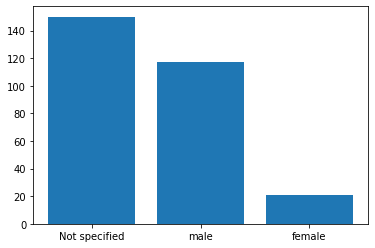

In [43]:
plt.bar(x=df2.gender, height = df2.users)